In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

C:\Users\ayush\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<h1>Step 1: Reading and Understanding the Data</h1>

In [2]:
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.shape

(730, 16)

In [4]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
#Check Datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#Check Missing Values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

<h1>Step 2: Visualising the Data</h1>

<h4>Visualising Numeric Variables</h4>

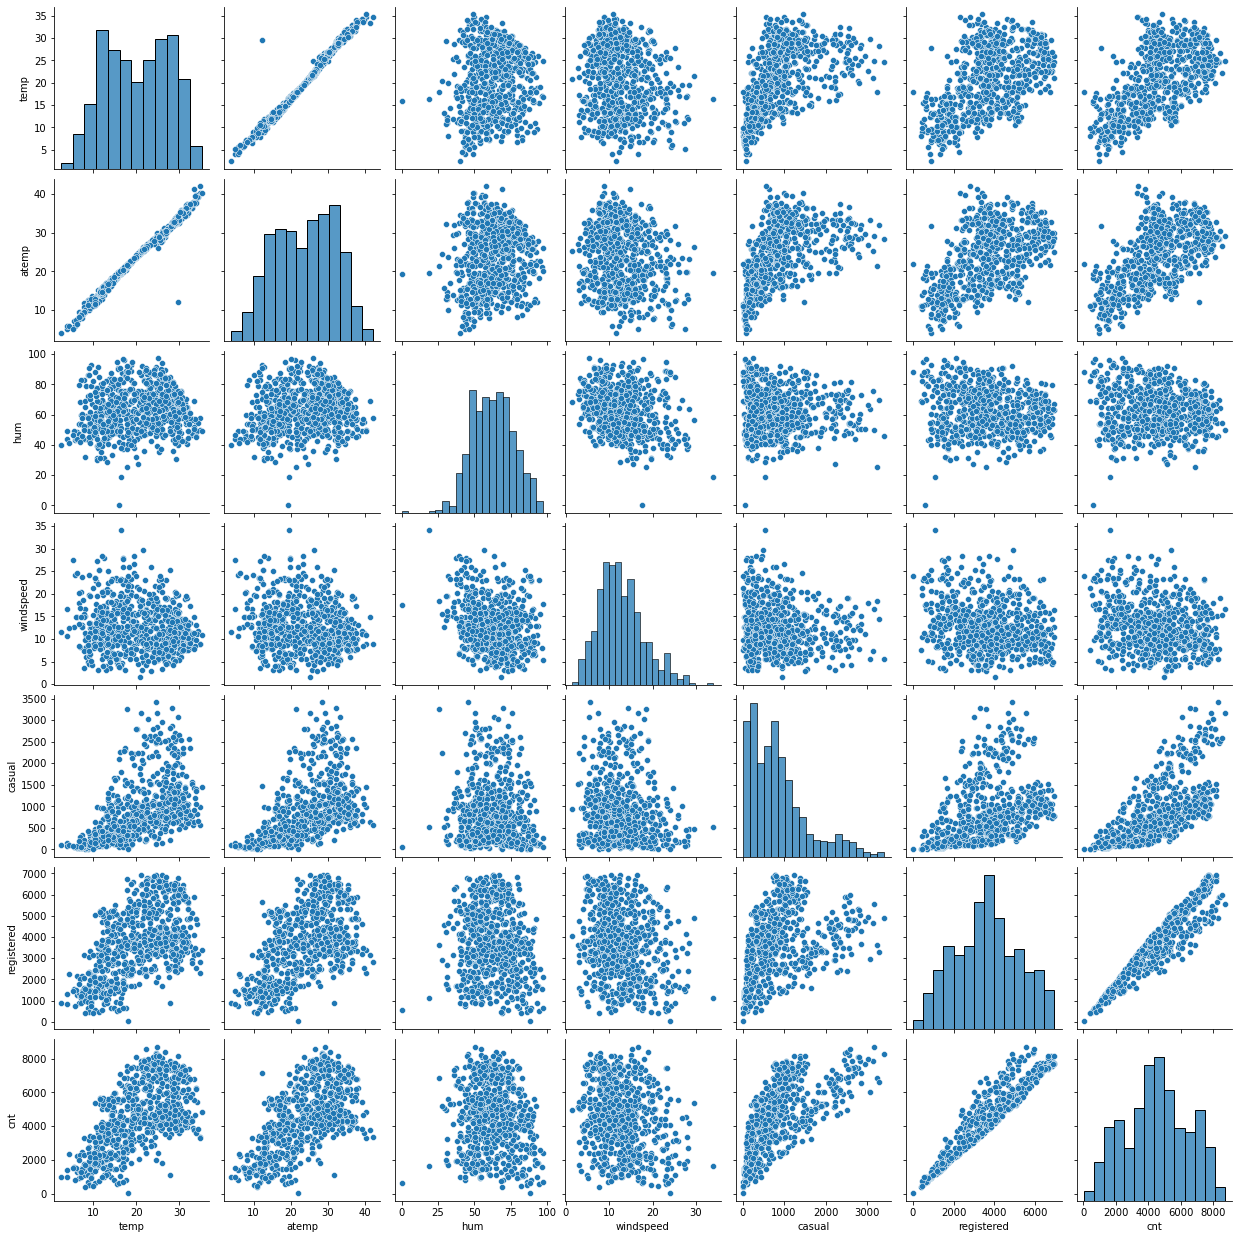

In [7]:
sns.pairplot(df, vars=["temp","atemp","hum","windspeed","casual", "registered", "cnt"])
plt.show()

<h3 style="color: #007bff; font-family: Arial, sans-serif;">Analysis Results</h3>
<p style="color: #333; font-family: Arial, sans-serif; line-height: 1.6;">After conducting a comprehensive analysis of the aforementioned plots, it becomes evident that certain independent variables exhibit a positive correlation with the 'cnt' variable.</p>
<div style="margin-top: 20px; padding: 10px; border: 1px solid #ccc; background-color: #fff; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
  <p style="color: #333; font-family: Arial, sans-serif;"><strong>Observation:</strong></p>
  <p style="color: #333; font-family: Arial, sans-serif; line-height: 1.6;">It is observed that bike rentals demonstrate a stronger correlation with temperature and bike rentals are more at high humidity</p>
</div>


<h4>Visualising Categorical Variables</h4>

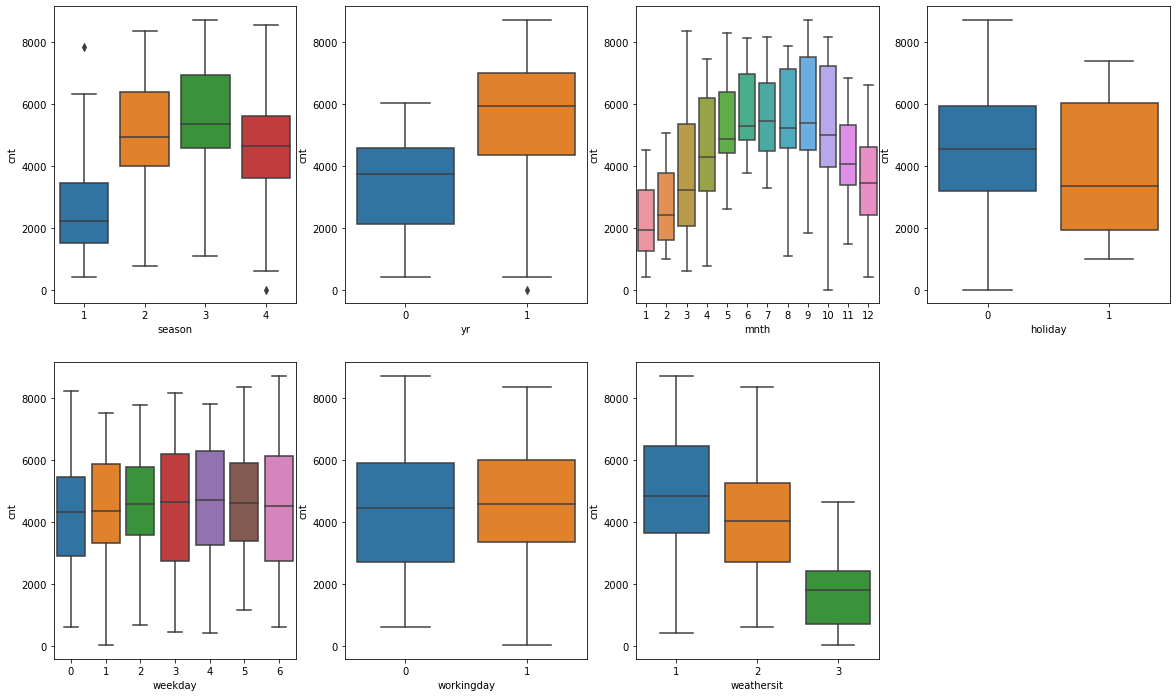

In [8]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.show()

<h3 style="color: #007bff; font-family: Arial, sans-serif;">Exploring the Relationship Between Categorical Variables and the Target</h3>
<p style="color: #333; font-family: Arial, sans-serif; line-height: 1.6;">The following plots depict the association between categorical variables and the target variable:</p>

<div style="margin-top: 20px; padding: 10px; border: 1px solid #ccc; background-color: #fff; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
  <p style="color: #333; font-family: Arial, sans-serif;"><strong>Observations:</strong></p>
  <ul style="color: #333; font-family: Arial, sans-serif; line-height: 1.6;">
    <li>Bike rentals are more popular on weekday (3, 4, 6).</li>
    <li>Bike rentals are more frequent during the season (2:summer, 3:fall)</li>
    <li>Bike rentals tend to increase during weathersit (1: Clear, Few clouds, Partly cloudy, Partly cloudy).</li>
    <li>Bike rentals were higher in the year 1(2019) compared to 0(2018).</li>
  </ul>
</div>


<h1>Step 3: Data Preparation</h1>

<h4>Drop the unnecessary variables from the dataset</h4>

In [9]:
df=df.drop(['instant','dteday','atemp','casual','registered'], axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [10]:
#This will update the 'month' column in the DataFrame 'df' with the corresponding full month names.
month_names = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}
df['mnth'] = df['mnth'].map(month_names)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,January,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,January,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,January,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,January,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,January,0,3,1,1,9.305237,43.6957,12.522300,1600


In [11]:
#This will update the 'season' column in the DataFrame 'df' with the corresponding full season names.
season_names = {1: 'spring', 2: 'summer',3:'fall', 4:'winter' }
df['season'] = df['season'].map(season_names)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,January,0,6,0,2,14.110847,80.5833,10.749882,985
1,spring,0,January,0,0,0,2,14.902598,69.6087,16.652113,801
2,spring,0,January,0,1,1,1,8.050924,43.7273,16.636703,1349
3,spring,0,January,0,2,1,1,8.200000,59.0435,10.739832,1562
4,spring,0,January,0,3,1,1,9.305237,43.6957,12.522300,1600


In [12]:
#This will update the 'weathersit' column in the DataFrame 'df' with the corresponding full weathersit names.
weathersit_names = {
    1: 'Clear',
    2: 'Mist_Cloudy',
    3: 'Light_Snow&Rain',
    4: 'Heavy_Rain&Ice_Pallets'}
df['weathersit'] = df['weathersit'].map(weathersit_names)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,January,0,6,0,Mist_Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,January,0,0,0,Mist_Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,January,0,1,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,January,0,2,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,January,0,3,1,Clear,9.305237,43.6957,12.522300,1600


In [13]:
#This will update the 'weekday' column in the DataFrame 'df' with the corresponding full weekday names.
weekday_names = {
    0: 'Sun',
    1: 'Mon',
    2: 'Tue',
    3: 'Wed',
    4: 'Thu',
    5: 'Fri',
    6: 'Sat'
}

df['weekday'] = df['weekday'].map(weekday_names)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,January,0,Sat,0,Mist_Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,January,0,Sun,0,Mist_Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,January,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,January,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,January,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


<h3>Dummy variables</h3>

In [14]:
seasons=pd.get_dummies(df.season, drop_first=True)
mnth=pd.get_dummies(df.mnth, drop_first=True)
weekdays=pd.get_dummies(df.weekday, drop_first=True)
weather_sit=pd.get_dummies(df.weathersit, drop_first=True)

df=pd.concat([seasons,mnth,weekdays,weather_sit,df],axis=1)
df.head()

,spring,summer,winter,August,December,February,January,July,June,March,...,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,January,0,Sat,0,Mist_Cloudy,14.110847,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,January,0,Sun,0,Mist_Cloudy,14.902598,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,January,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,January,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,January,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


In [15]:
# Drop 'season','mnth','weekday','weathersit' as we have created the dummies for it
df.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)
df.head()

,spring,summer,winter,August,December,February,January,July,June,March,...,Wed,Light_Snow&Rain,Mist_Cloudy,yr,holiday,workingday,temp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,14.110847,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,14.902598,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


In [16]:
pd.set_option('display.max_columns', 50)
df.head()

,spring,summer,winter,August,December,February,January,July,June,March,May,November,October,September,Mon,Sat,Sun,Thu,Tue,Wed,Light_Snow&Rain,Mist_Cloudy,yr,holiday,workingday,temp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,14.110847,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,14.902598,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


<h1>Step 4: Splitting the Data into Training and Testing Sets</h1>

In [17]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_train.shape, df_test.shape)

(510, 29) (219, 29)


<h1>Step 5: Rescaling the Features</h1>

In [18]:
scaler = MinMaxScaler()

num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

C:\Users\ayush\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,spring,summer,winter,August,December,February,January,July,June,March,May,November,October,September,Mon,Sat,Sun,Thu,Tue,Wed,Light_Snow&Rain,Mist_Cloudy,yr,holiday,workingday,temp,hum,windspeed,cnt
653,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0.509887,0.575354,0.300794,0.864243
576,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0.442393,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0.245101,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0.395666,0.504508,0.188475,0.482973


In [19]:
df_train.describe()

,spring,summer,winter,August,December,February,January,July,June,March,May,November,October,September,Mon,Sat,Sun,Thu,Tue,Wed,Light_Snow&Rain,Mist_Cloudy,yr,holiday,workingday,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620
std,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


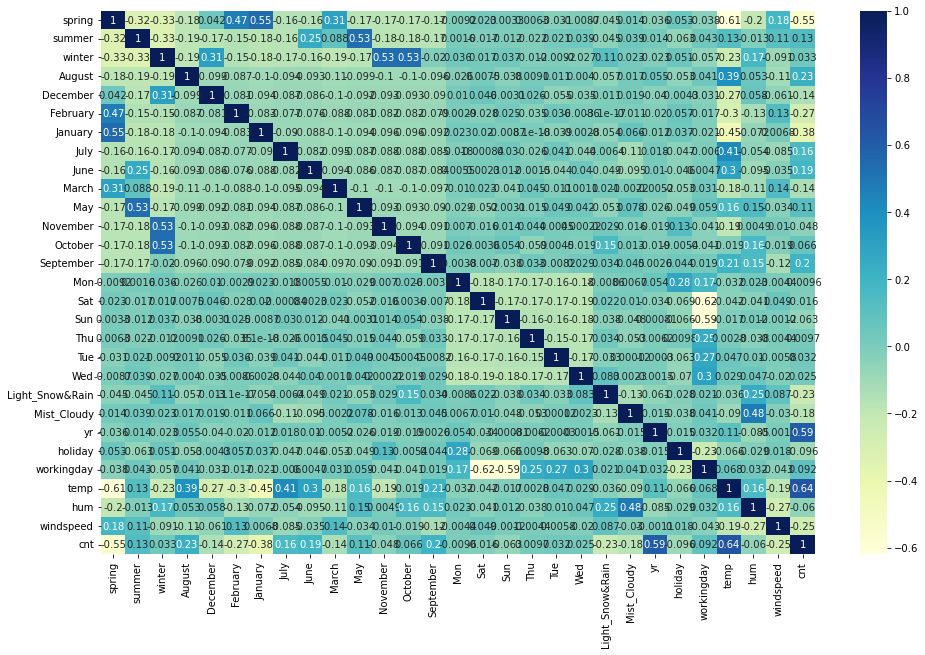

In [20]:
# TTo check which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

<h3> Dividing into X and Y sets for the model building </h3>

In [21]:
y_train = df_train.pop('cnt')
X_train = df_train

In [22]:
print(y_train.shape, X_train.shape)

(510,) (510, 28)


<h1>Step 6: Building the model</h1>

In [23]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 18)
rfe = rfe.fit(X_train, y_train)

C:\Users\ayush\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=18 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [24]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('August', False, 3),
 ('December', True, 1),
 ('February', True, 1),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 7),
 ('March', False, 11),
 ('May', False, 2),
 ('November', True, 1),
 ('October', False, 9),
 ('September', True, 1),
 ('Mon', False, 5),
 ('Sat', True, 1),
 ('Sun', False, 4),
 ('Thu', False, 10),
 ('Tue', False, 6),
 ('Wed', False, 8),
 ('Light_Snow&Rain', True, 1),
 ('Mist_Cloudy', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [25]:
#columns where RFE support is True
columns = X_train.columns[rfe.support_]
columns

Index(['spring', 'summer', 'winter', 'December', 'February', 'January', 'July',
       'November', 'September', 'Sat', 'Light_Snow&Rain', 'Mist_Cloudy', 'yr',
       'holiday', 'workingday', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [26]:
X_train_RFE = X_train[columns]

In [27]:
import statsmodels.api as sm  
X_train_RFE = sm.add_constant(X_train_RFE)

C:\Users\ayush\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [28]:
lm = sm.OLS(y_train,X_train_RFE).fit()

In [29]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     156.6
Date:                Mon, 07 Aug 2023   Prob (F-statistic):          3.55e-190
Time:                        20:26:47   Log-Likelihood:                 525.15
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     491   BIC:                            -931.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2873      0.038     

In [30]:
X_train_new = X_train_RFE.drop(['const'], axis=1)

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,hum,31.76
15,temp,19.75
0,spring,5.61
14,workingday,5.38
17,windspeed,4.79
2,winter,4.12
1,summer,2.88
5,January,2.40
11,Mist_Cloudy,2.33
12,yr,2.10


<p style="color: #765334343; font-family: Arial, sans-serif;">We can safely remove the 'hum' variable from our analysis, as it is deemed insignificant due to its extremely high VIF (Variance Inflation Factor).</p>


In [31]:
X_train_new2 = X_train_new.drop(["hum"], axis = 1)

In [32]:
X_train_new2 = sm.add_constant(X_train_new2)
lm_2 = sm.OLS(y_train,X_train_new2).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     160.3
Date:                Mon, 07 Aug 2023   Prob (F-statistic):          4.80e-188
Time:                        20:26:47   Log-Likelihood:                 517.36
No. Observations:                 510   AIC:                            -998.7
Df Residuals:                     492   BIC:                            -922.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2187      0.034     

C:\Users\ayush\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [33]:
X_train_new3 = X_train_new2.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,temp,7.30
14,workingday,5.35
16,windspeed,4.73
0,spring,4.55
2,winter,3.07
1,summer,2.33
5,January,2.24
12,yr,2.08
9,Sat,1.99
4,February,1.89


<p><b> 'Holiday' have High p-value & low VIF, So droping 'Holiday'</p></b>

In [34]:
X_train_new4 = X_train_new3.drop(['holiday'], axis=1)
X_train_new4 = sm.add_constant(X_train_new4)
lm_2 = sm.OLS(y_train,X_train_new4).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.4
Date:                Mon, 07 Aug 2023   Prob (F-statistic):          1.65e-188
Time:                        20:26:47   Log-Likelihood:                 515.78
No. Observations:                 510   AIC:                            -997.6
Df Residuals:                     493   BIC:                            -925.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2140      0.034     

C:\Users\ayush\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [35]:
y_train_price = lm_2.predict(X_train_new4)

C:\Users\ayush\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

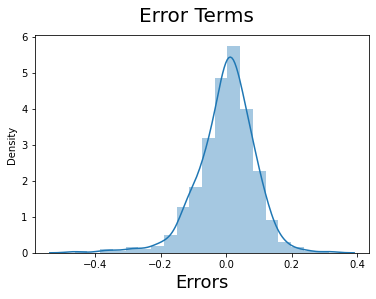

In [36]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [37]:
X_train_new4.columns

Index(['const', 'spring', 'summer', 'winter', 'December', 'February',
       'January', 'July', 'November', 'September', 'Sat', 'Light_Snow&Rain',
       'Mist_Cloudy', 'yr', 'workingday', 'temp', 'windspeed'],
      dtype='object')

<h1>Making Predictions</h1>
<h4>Applying the scaling on the test sets</h4>

In [38]:
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

C:\Users\ayush\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [39]:
y_test = df_test.pop('cnt')
X_test = df_test

In [43]:

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new6 = X_test[['spring', 'summer', 'winter', 'December', 'February',
       'January', 'July', 'November', 'September', 'Sat', 'Light_Snow&Rain',
       'Mist_Cloudy', 'yr', 'workingday', 'temp', 'windspeed']]

# Adding a constant variable 
X_test_new6 = sm.add_constant(X_test_new6)

<h1>Model Evaluation</h1>

In [44]:
# Making predictions
y_pred = lm_2.predict(X_test_new6)

Text(0, 0.5, 'y_pred')

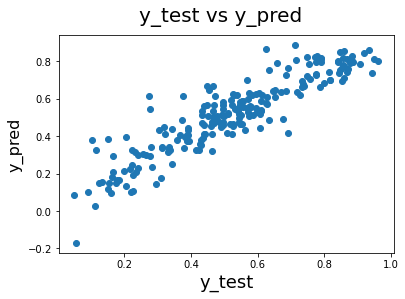

In [45]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

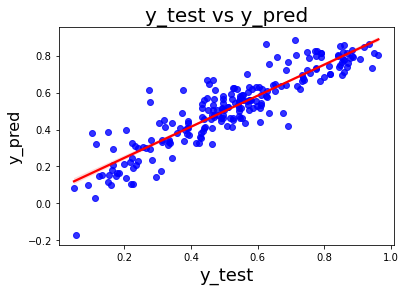

In [47]:
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                         
plt.ylabel('y_pred', fontsize=16)                
plt.show()